In [47]:
import pandas as pd
import numpy as np
from pca import PCA
from fuzzy_entropy import FuzzyEntropy
import matplotlib.pyplot as plt

In [48]:
n_components=1
similarity = 0.5

In [49]:
dataframe = pd.read_excel("Book1.xlsx")
data = dataframe.to_numpy()
dataframe.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [50]:
data = data[:,:]

In [51]:
def show(info,dim):
    colors= ["green", "red", "blue","yellow","orange","black","purple"]
    if dim <=3:
        if dim ==3:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')

        for i,data_i in enumerate(info.values()):
            final_data=[data_i["class_centroid"]]
            final_data.extend(data_i["data"])
            final_data= np.array(final_data)
            if dim ==1:
                plt.scatter(range(len(final_data[:,0])),final_data[:,0],c=colors[i])
            elif dim ==2:
                plt.scatter(final_data[:,0],final_data[:,1],c=colors[i])
            else:
                
                x = final_data[:,0]
                y = final_data[:,1]
                z = final_data[:,2]
                if i%7==0:
                    i= i-1
                ax.scatter(x, y, z, c=colors[i], marker='o')
        plt.show()


In [ ]:
pca = PCA(n_components=4)
pca.fit(data)
reduced_data = pca.transform(data)
# model = FuzzyEntropy()
# info =model.fit(reduced_data,s=similarity)

#Reduced To:  5 , Number of Classes:  2
# [4407.65986488   49.5632381  -375.77007066  278.51072448 1068.77329766]
# actual:
#  [  90.2    10.      7.58   44.9  1610.  ]

eigen function


In [45]:
compoentn = pca.components[:-1]
(np.dot(np.dot(data[0],compoentn.T),compoentn)
,data[0])

(array([ 8.99470255e+01,  2.80932418e+01, -1.42284455e+00,  2.72313417e+01,
         1.60998931e+03]),
 array([  90.2 ,   10.  ,    7.58,   44.9 , 1610.  ]))

eigen function
Reduced To:  1 , Number of Classes:  6
[  55.30932909   29.6935802     6.52887007   44.50221006 1609.94733931]


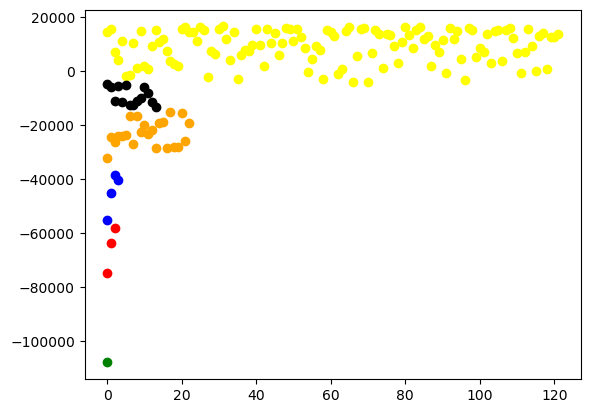

eigen function
Reduced To:  2 , Number of Classes:  6
[  89.9227234    20.13935827    6.17096895   34.40514886 1609.99388445]


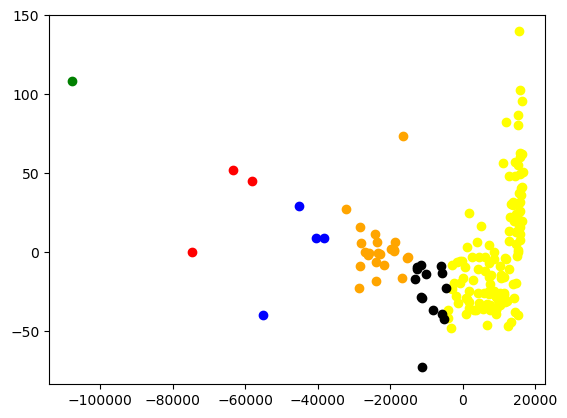

eigen function
Reduced To:  3 , Number of Classes:  6
[  90.10336519   20.45367355    6.16558482   34.72717432 1609.99380222]


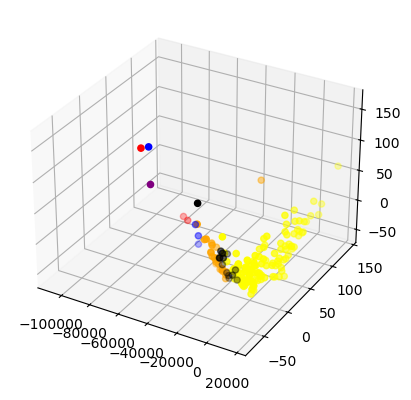

In [ ]:
for t in range(3):
    pca = PCA(n_components=t+1)
    pca.fit(data)
    reduced_data = pca.transform(data)
    model = FuzzyEntropy()
    info =model.fit(reduced_data,s=similarity)
    print("Reduced To: ",reduced_data.shape[1],", Number of Classes: ",len(info))
    print(pca.reverse(reduced_data)[0])
    show(info,dim=t+1)
    # [90.04991964 17.45184144  6.24345231 32.31991784]

